<a href="https://colab.research.google.com/github/AbdulrahmanElshafie/LeNet_Model/blob/main/LeNet_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow.keras.layers as tfl
import pandas as pd
from sklearn.metrics import confusion_matrix


In [ ]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def one_hot_encode(Y):
    nClasses = np.unique(Y).shape[0]
    coded = np.zeros((len(Y), nClasses)).astype(np.float32)
    coded[np.arange(len(Y)), Y] = 1.0
    return coded

In [ ]:
# Normalize image vectors
x_train = x_train_orig/255.
x_test = x_test_orig/255.

y_train = one_hot_encode(y_train_orig)
y_test = one_hot_encode(y_test_orig)

print("Number of training examples = " + str(x_train.shape[0]))
print("Number of testing examples = " + str(x_test.shape[0]))
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

Number of training examples = 60000
Number of testing examples = 10000
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [ ]:
unique_labels = np.unique(y_train)

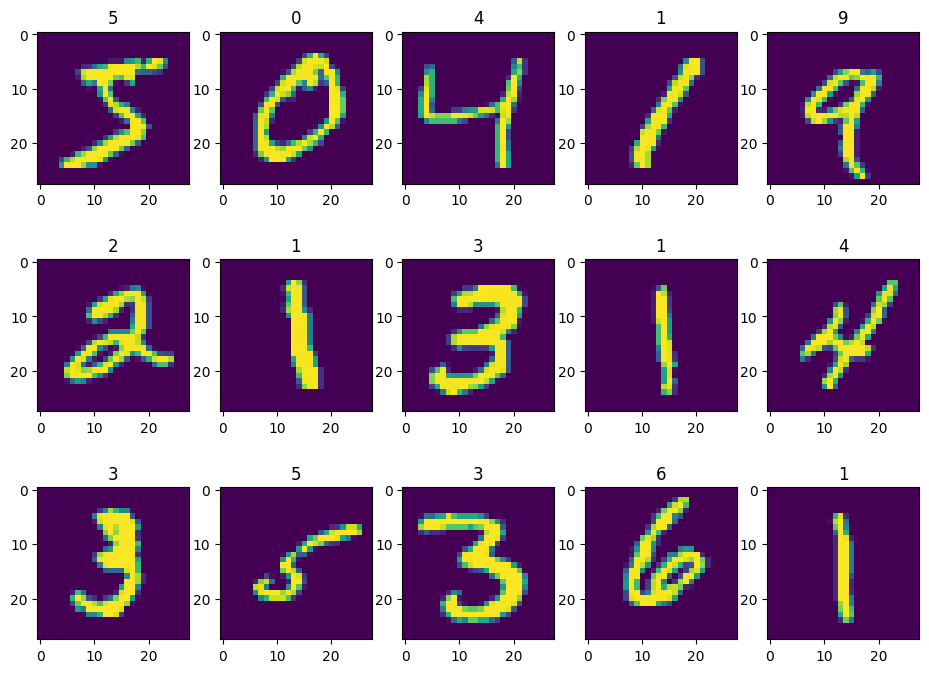

In [ ]:
n_row=5
n_col=5

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i in range(15):
  plt.subplot(n_row, n_col, i + 1)
  plt.imshow(x_train[i])
  plt.title(y_train_orig[i])
  plt.show

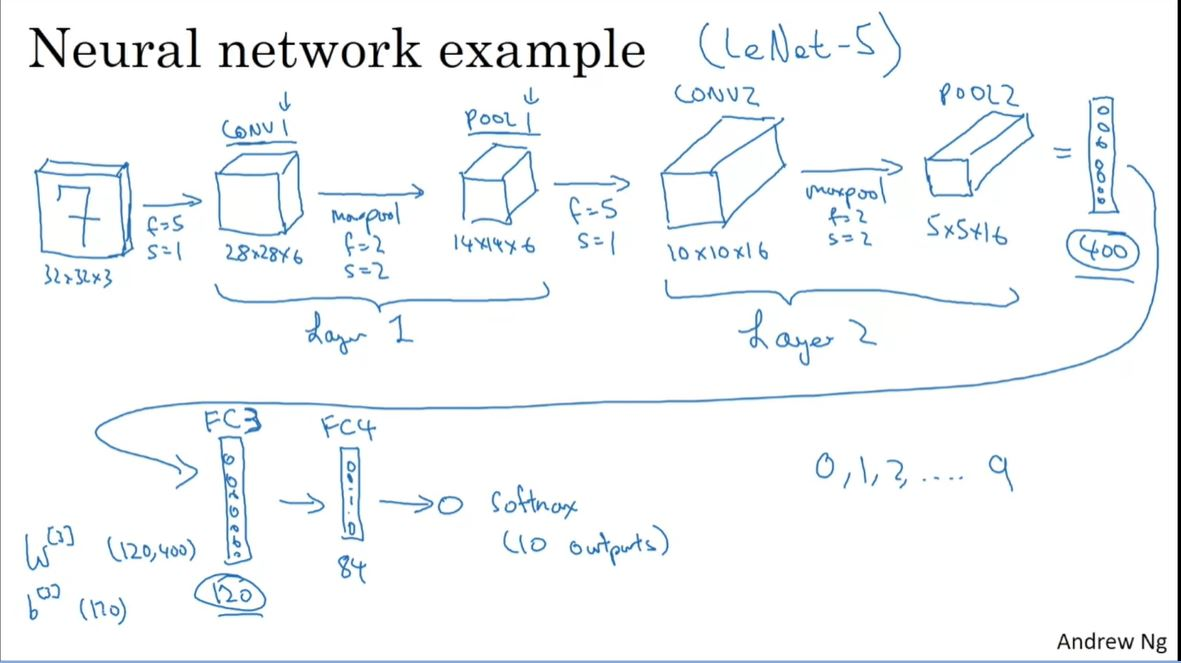

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', name='conv1'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool1'),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', name='conv2'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool2'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu', name='fc1'),
        tf.keras.layers.Dense(84, activation='relu', name='fc2'),
        tf.keras.layers.Dense(10, activation='softmax', name='fc3'),
    ]
)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
model.build(x_train.shape)
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.F1Score()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (60000, 24, 24, 6)        156       
                                                                 
 pool1 (MaxPooling2D)        (60000, 12, 12, 6)        0         
                                                                 
 conv2 (Conv2D)              (60000, 8, 8, 16)         2416      
                                                                 
 pool2 (MaxPooling2D)        (60000, 4, 4, 16)         0         
                                                                 
 flatten (Flatten)           (60000, 256)              0         
                                                                 
 fc1 (Dense)                 (60000, 120)              30840     
                                                                 
 fc2 (Dense)                 (60000, 84)               1

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 40s 10ms/step - loss: 0.2023 - accuracy: 0.9381 - precision: 0.9620 - recall: 0.9189 - f1_score: 0.9377 - val_loss: 0.0743 - val_accuracy: 0.9787 - val_precision: 0.9814 - val_recall: 0.9762 - val_f1_score: 0.9785
Epoch 2/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0666 - accuracy: 0.9795 - precision: 0.9819 - recall: 0.9770 - f1_score: 0.9793 - val_loss: 0.0456 - val_accuracy: 0.9863 - val_precision: 0.9878 - val_recall: 0.9848 - val_f1_score: 0.9862
Epoch 3/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0491 - accuracy: 0.9844 - precision: 0.9859 - recall: 0.9832 - f1_score: 0.9844 - val_loss: 0.0458 - val_accuracy: 0.9870 - val_precision: 0.9895 - val_recall: 0.9855 - val_f1_score: 0.9869
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0383 - accuracy: 0.9878 - precision: 0.9891 - recall: 0.9869 - f1_score: 0.9877 - val_loss: 0.0452 - val_accura

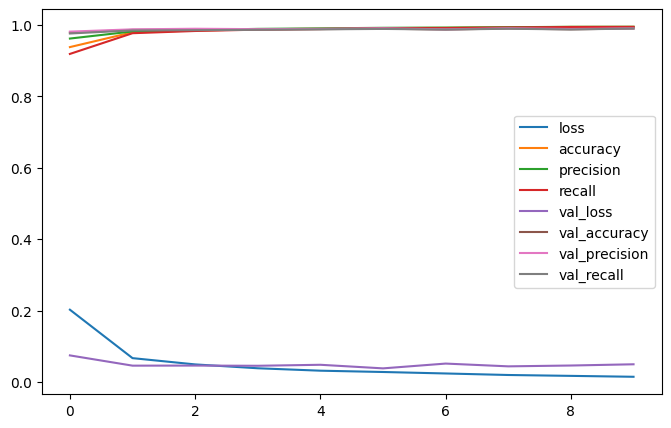

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
confusion_matrix(np.argmax(y_test, axis =1).reshape(-1, 1), np.argmax(y_pred, axis=1).reshape(-1, 1))

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    0,    1],
       [   0, 1130,    3,    0,    0,    0,    1,    0,    0,    1],
       [   1,    1, 1019,    4,    0,    0,    3,    3,    1,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    1,    0,  970,    0,    3,    0,    1,    7],
       [   2,    1,    0,    5,    0,  868,    7,    0,    6,    3],
       [   1,    2,    0,    0,    0,    1,  952,    0,    2,    0],
       [   0,    3,    6,    1,    0,    0,    0, 1012,    3,    3],
       [   4,    0,    2,    1,    0,    1,    1,    0,  961,    4],
       [   0,    0,    0,    1,    6,    2,    0,    0,    6,  994]])

In [ ]:
model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', name='conv1'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, name='pool1'),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', name='conv2'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, name='pool2'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu', name='fc1'),
        tf.keras.layers.Dense(84, activation='relu', name='fc2'),
        tf.keras.layers.Dense(10, activation='softmax', name='fc3'),
    ]
)

In [ ]:
model2.build(x_train.shape)
model2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.F1Score()])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (60000, 24, 24, 6)        156       
                                                                 
 pool1 (AveragePooling2D)    (60000, 12, 12, 6)        0         
                                                                 
 conv2 (Conv2D)              (60000, 8, 8, 16)         2416      
                                                                 
 pool2 (AveragePooling2D)    (60000, 4, 4, 16)         0         
                                                                 
 flatten_1 (Flatten)         (60000, 256)              0         
                                                                 
 fc1 (Dense)                 (60000, 120)              30840     
                                                                 
 fc2 (Dense)                 (60000, 84)              

In [ ]:
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

In [ ]:
pd.DataFrame(model2.history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
# y_pred = np.argmax(y_pred, axis=1).reshape(-1, 1)
# y_test = np.argmax(y_test, axis =1).reshape(-1, 1)